In [4]:
%load_ext autoreload

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")

In [7]:
sys.path.append(MODULES_PATH)

In [8]:
from active_learning import ExperimentSuitMetrics
from utils import MetricsTransformer

In [13]:
%autoreload 2
path = os.path.join(METRICS_PATH, "28_07_2021_mnist_adam")
metrics_handler = ExperimentSuitMetrics(path)

In [20]:
dtypes = {
    "iteration": int,
    "train_time": float,
    "query_time": float,
    "eval_loss": float,
    "eval_accuracy": float,
    "labeled_pool_size": int
}

df_random = MetricsTransformer.load_from_dir(metrics_handler, "random", dtype=dtypes)
df_max_ent = MetricsTransformer.load_from_dir(metrics_handler, "max_entropy", dtype=dtypes)
df_bald = MetricsTransformer.load_from_dir(metrics_handler, "bald", dtype=dtypes)
df_std_mean = MetricsTransformer.load_from_dir(metrics_handler, "std_mean", dtype=dtypes)
df_var = MetricsTransformer.load_from_dir(metrics_handler, "max_var_ratio", dtype=dtypes)

Text(0.5, 1.0, 'BALD')

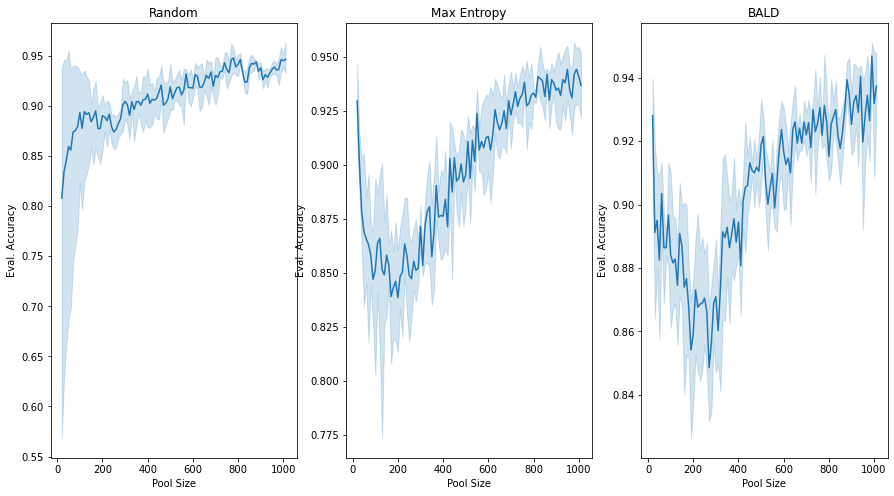

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(15, 8))

sns.lineplot(ax=ax[0], data=df_random, y="eval_accuracy", x="labeled_pool_size")
ax[0].set_xlabel("Pool Size")
ax[0].set_ylabel("Eval. Accuracy")
ax[0].set_title("Random")

sns.lineplot(ax=ax[1], data=df_max_ent, y="eval_accuracy", x="labeled_pool_size")
ax[1].set_xlabel("Pool Size")
ax[1].set_ylabel("Eval. Accuracy")
ax[1].set_title("Max Entropy")

sns.lineplot(ax=ax[2], data=df_bald, y="eval_accuracy", x="labeled_pool_size")
ax[2].set_xlabel("Pool Size")
ax[2].set_ylabel("Eval. Accuracy")
ax[2].set_title("BALD")

In [37]:
dtypes = {
    "iteration": int,
    "labeled_pool_size": int,
    "eval_accuracy": float,
    "eval_loss": float,
    "query_time": float,
    "train_time": float
}
columns = list(dtypes.keys())
df_random_m = MetricsTransformer.mean(df_random, columns, dtype=dtypes)
df_ent_m = MetricsTransformer.mean(df_max_ent, columns, dtype=dtypes)
df_bald_m = MetricsTransformer.mean(df_bald, columns, dtype=dtypes)

df_random_m.insert(0, "method", "Random")
df_ent_m.insert(0, "method", "Max Entropy")
df_bald_m.insert(0, "method", "BALD")

In [38]:
merged = pd.concat([df_random_m, df_ent_m, df_bald_m])

<AxesSubplot:xlabel='labeled_pool_size', ylabel='query_time'>

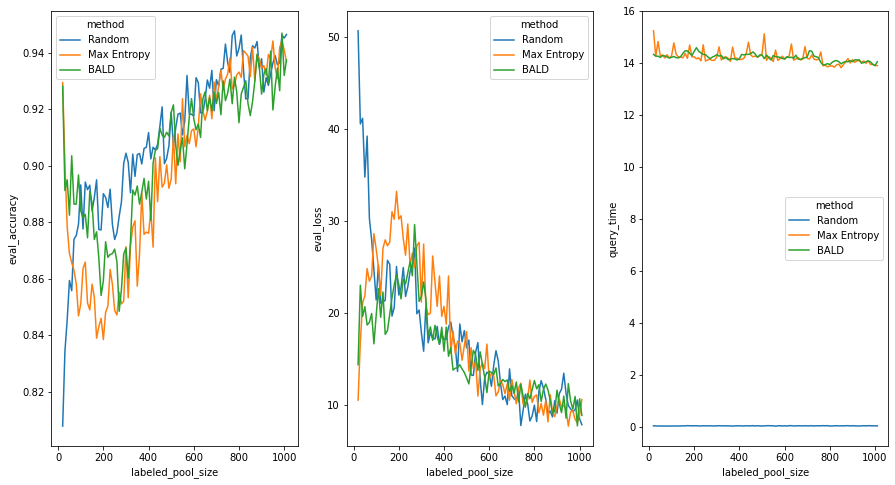

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(15, 8))

sns.lineplot(ax=ax[0], data=merged, x="labeled_pool_size", y="eval_accuracy", hue="method")
sns.lineplot(ax=ax[1], data=merged, x="labeled_pool_size", y="eval_loss", hue="method")
sns.lineplot(ax=ax[2], data=merged, x="labeled_pool_size", y="query_time", hue="method")